In [10]:
##importing the relevant classes and libaries to be used.
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [11]:
##reading in the data 
iris = load_iris()

##loading X (regressors) and y (dependent vars)
X = iris.data
y = iris.target

In [12]:
#use train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4)

#Running the procedure for the classification accuracy of KNN with K = 5:
knn = KNeighborsClassifier(n_neighbors=5)

#training / determining the coefficients based on data in X_train and y_train:
knn.fit(X_train,y_train)

##Using the model we had fitted above to predict y_test data using X_test data:
y_pred = knn.predict(X_test)

##Comparing our predictions for y_test (=y_pred) and the actual values of y_test:
print(metrics.accuracy_score(y_test, y_pred))

0.973684210526


In [16]:
#-------------------------------------------------------------------------------------
## By varying the number in the random_state, we can observe that train/test split is a high variance test of accuracy.
## Thus, another test we can use is the Kfold cross-validation test for choosing the optimal tuning parameters and choosing 
## between models and features.

##Implementing Cross-validation recommendations:
# K = 10 folds is recommended
# Stratified sampling. If there are 2 classifications, one is n% of the entire set, each sample / k fold should have n% of that
# classification.

#importing cross_val_score to be used:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation with K=5 neighbors for KNN (the n_neighbors parameter):
knn = KNeighborsClassifier(n_neighbors=5)

# The process takes the whole of X and y sets and splits it up themself, thus not needed to specify X_train/test or y_train/test
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

# Taking the mean accuracy of our model to determine on average for all 10 folds;
# how accurate was our model based on 5 neighbors on X/y set. This is the Average accuracy - estimating out-of-sample accuracy:
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]
0.966666666667


In [15]:
# ^On average, the accuracy of the model will be around 96% accurate in predicting out-of-sample estimates.

0.966666666667


In [17]:
# Now determining the optimal value for K for KNN
# We want to test the different accuracies from from K=1 to K=31:
k_range = range(1,31)

# Creating an empty list to save our accuracy scores in:
k_scores = []

# for-loop for iterating through each value of k from 1 to 31 and saving the average accuracy:
for k in k_range:
    # for this instance, run KNeighborsClassifier on whatever value of k is right now (remember it is iterating from 1 - 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # save all scores, the cross validation score of all 10-folds. 
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    
    # append to k_scores list the mean score of this instance of k:
    k_scores.append(scores.mean())
    
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


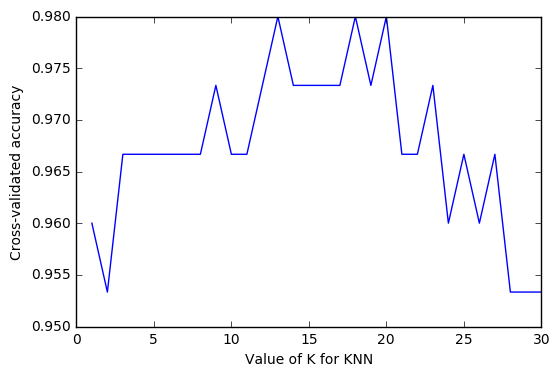

In [20]:
# ^the above shows the average accuracy for k number of neighbors taken into account from 1 to 31. To better visualise it, we
# plot the above information as a function of k

# importing matplotlib.pypyplot
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [23]:
# Choose the value that chooses the simplest model (i.e, the most parsimonious model). For KNN, the higher the number,
# the more parsimonious the model is. In this example, KNN = 20 is the most parsimonious model which balances the bias / var
# equally.

# Hence, we select KNN = 20 as our best model.

0.98


In [24]:
#-------------------------------------------------------------------------------------------
# Model selection. Chosing between KNN model and Logistic regression model.

# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.98


In [26]:
# 10-fold cross-validation with logistic regression
# import logistic regression function
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
print(cross_val_score(logreg, X,y,cv=10,scoring='accuracy').mean())

0.953333333333


In [27]:
# ^comparing an accuracy of 0.98 vs 0.95 (i.e., 98% vs 95%), we can conclude that our KNN model is a better choice / model to chose to
# estamate out-of-sample data.

In [28]:
#-------------------------------------------------------------------------------------------------
# Cross-validation for Feature selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [31]:
#Reading the data into pandas. Use advertising dataset as before in the other workbook.
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

#checking that the data has been imported in w/ the initial column, col 0 being turned into the index for the dataset:
print(data.head())

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [36]:
# Creating a python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# Using the above list to select the subset of a dataframe and mapping it to X (regressors)
X = data[feature_cols]

# Now use pandas to extract the Sales column and map it to y as our response / dependent vars:
y = data['Sales']

In [37]:
# Checking that both X and y has been mapped correctly:
print(X.head())
print(type(X))
print(y.head())
print(type(y))

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
<class 'pandas.core.frame.DataFrame'>
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [38]:
# ^and thus we can see that X now only contains the regressors TV / Radio / Newspaper. y only contains Sales as its responses :)

# Note: This was a good method to check that you have the right vars extracted. Actually extracted the 'Sales' column as X
# before I had checked and noticed that it was included. Modified / corrected it before proceeding.

# performing 10-fold cross-validation with all three features:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [39]:
# Recalling that mean_squared_error is a sqrt function of the sum of squared errors, we know that the values above should not
# be negative. (intuitively, squaring errors never amount to -ve's.). However cross_val_score had calculated and outputted the above
# to reflect 'the higher the score; the better the model' for cost functions. This is to be consistent with the evaluation of
# the accuracy scores of models. 

#to fix the sign of MSE scores:
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [40]:
# convert from MSE to RMSE (Root Mean Squared Error). Call numpy (np) to perform function of sqrt
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [41]:
# calculating the average RMSE
print(rmse_scores.mean())

1.69135317081


In [42]:
# As we are trying to compare the model where we include 'Newspaper' as one of the regressors (i.e. +betaNewspaper)
# vs without a model without that regressor. We can perform another test of the model without the newspaper regressor
# and check the root mean squared error to see if the model is better off without this variable.

# 10-fold cross-validation with two features (i.e. TV and Radios ONLY):
# Assigning X to now be only TV and Radio:
feature_cols = ['TV', 'Radio']

X = data[feature_cols]

# Again, we set y to be the Sales / dependent variable
y = data['Sales']

In [43]:
print(X.head())
print(type(X))
print(y.head())
print(type(y))

      TV  Radio
1  230.1   37.8
2   44.5   39.3
3   17.2   45.9
4  151.5   41.3
5  180.8   10.8
<class 'pandas.core.frame.DataFrame'>
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [48]:
# ^confirmed that now we are only taking the variables TV and Radio as our regressors as a function of Sales.

# Now to compute the Root Mean Squared Error:
print(np.sqrt(-cross_val_score(lm,X,y,cv=10,scoring='mean_squared_error')).mean())

#ie, the above is actually saying 'print the squareroot of the average of all the mean squared error's of the model that compares
# using the difference between the prediction using linear regression and the actual values of y' (the root mean squared error formula)
# It is important to note that the formula used itself first does the following. It looks at the difference between the predicted
# value versus the actual y value; and Squares the differences. Afterwards, the squared differences are Summed up THEN averaged.
# The total is THEN square rooted. The .mean() then takes the average of all of the RMSE's. This is not the mean performed in the
# formula itself. This has already been done in the cross_val_score. 

1.67967484191


In [49]:
# as we can see, 1.69 vs 1.73, as 1.69 > 1.67, we can conclude that actually, our model is better off without the 'newspaper'
# component in our model; as our cost function produces less error without the variable than with the variable. (i.e. the lower
# the better)